In [109]:


from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Change directory to a specific folder in Google Drive
colab_folder = '/content/drive/MyDrive/project Data Science/Poqemon-QoE-Dataset-master'
os.chdir(colab_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/project Data Science/Poqemon-QoE-Dataset-master/pokemon.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
     id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
0   590       71                360       528.39294         24.950000   
1   428       46                360       402.64664         30.066667   
2   406       44                360       735.84070         24.200000   
3  1256      133                240       529.48830         24.116667   
4   244       22                360       736.00085         24.066667   

   QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
0               0         43.800000                 0                   2   
1               0         44.200000                 0                   2   
2               0         44.183333                 0                   2   
3               9         43.850000                 0                   2   
4               0         43.850000                 0                   2   

   QoA_BUFFERINGtime  ...       QoD_os-version  QoD_api-level QoU_sex

In [111]:
# Check the structure of the dataset
print("\nDataset Info:")
data.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1543 non-null   int64  
 1   user_id             1543 non-null   int64  
 2   QoA_VLCresolution   1543 non-null   int64  
 3   QoA_VLCbitrate      1543 non-null   float64
 4   QoA_VLCframerate    1543 non-null   float64
 5   QoA_VLCdropped      1543 non-null   int64  
 6   QoA_VLCaudiorate    1543 non-null   float64
 7   QoA_VLCaudioloss    1543 non-null   int64  
 8   QoA_BUFFERINGcount  1543 non-null   int64  
 9   QoA_BUFFERINGtime   1543 non-null   int64  
 10  QoS_type            1543 non-null   int64  
 11  QoS_operator        1543 non-null   int64  
 12  QoD_model           1543 non-null   object 
 13  QoD_os-version      1543 non-null   object 
 14  QoD_api-level       1543 non-null   int64  
 15  QoU_sex             1543 non-null   int6

In [112]:

# Check for missing values
print("\nMissing values per column:")
missing_values = data.isnull().sum()
print(missing_values)


Missing values per column:
id                    0
user_id               0
QoA_VLCresolution     0
QoA_VLCbitrate        0
QoA_VLCframerate      0
QoA_VLCdropped        0
QoA_VLCaudiorate      0
QoA_VLCaudioloss      0
QoA_BUFFERINGcount    0
QoA_BUFFERINGtime     0
QoS_type              0
QoS_operator          0
QoD_model             0
QoD_os-version        0
QoD_api-level         0
QoU_sex               0
QoU_age               0
QoU_Ustedy            0
QoF_begin             0
QoF_shift             0
QoF_audio             0
QoF_video             0
MOS                   0
dtype: int64


In [113]:
# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")



Number of duplicate rows: 0


<ipython-input-114-2e691954b854>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MOS', data=data, palette='Greens')


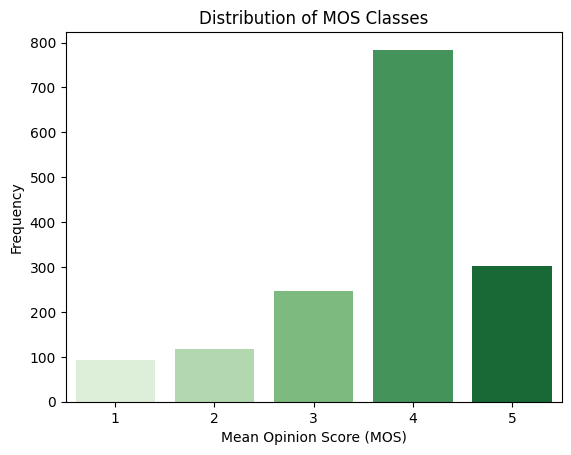

In [114]:
# Visualize the distribution of the MOS column
sns.countplot(x='MOS', data=data, palette='Greens')
plt.title('Distribution of MOS Classes')
plt.xlabel('Mean Opinion Score (MOS)')
plt.ylabel('Frequency')
plt.show()

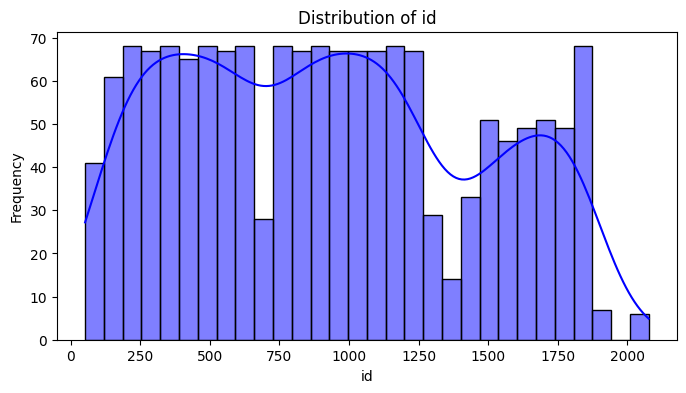

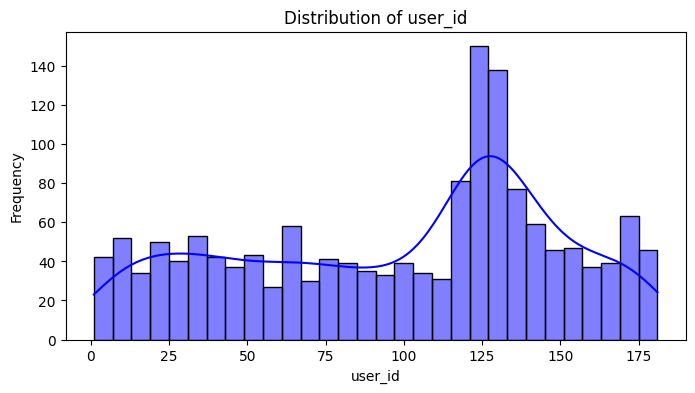

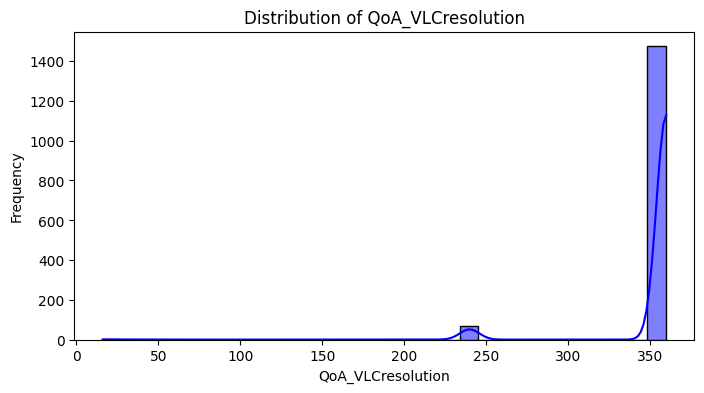

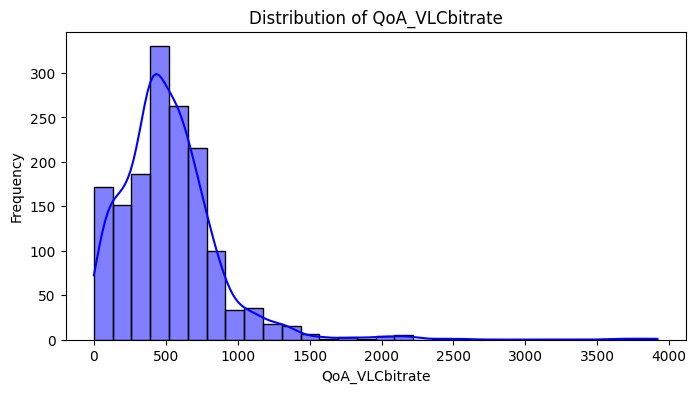

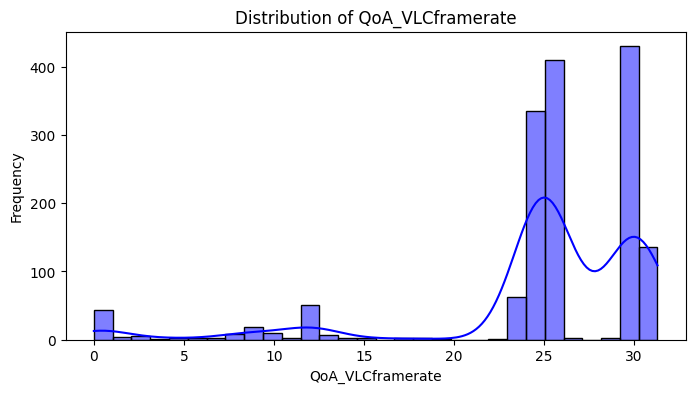

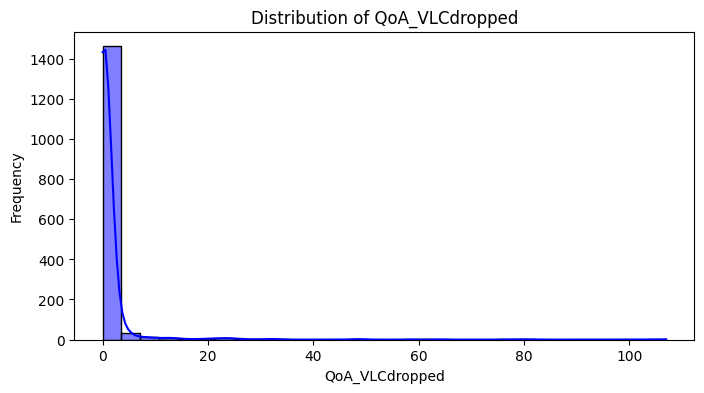

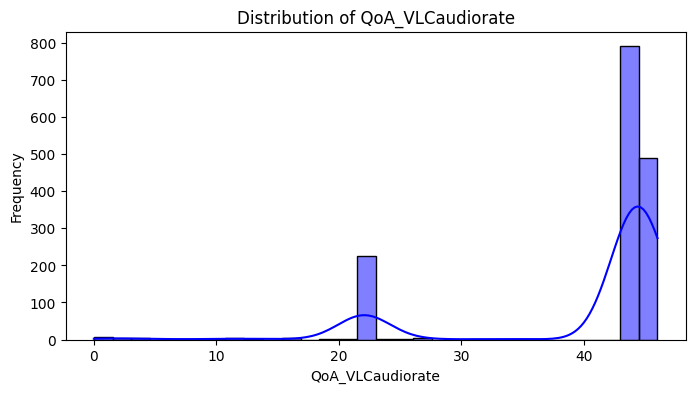

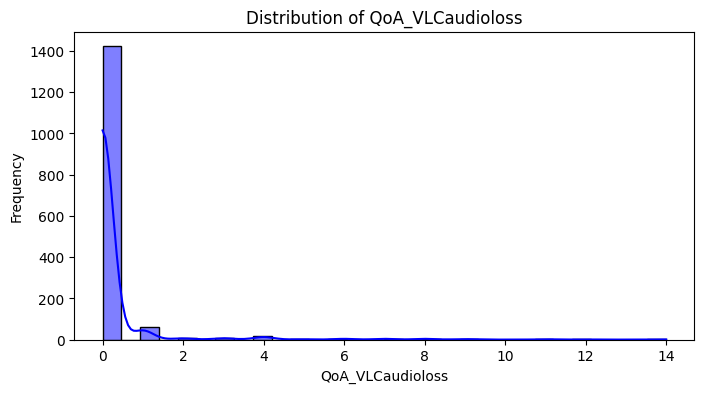

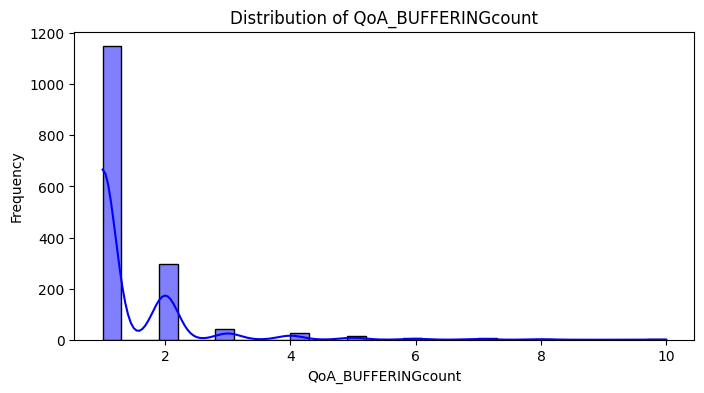

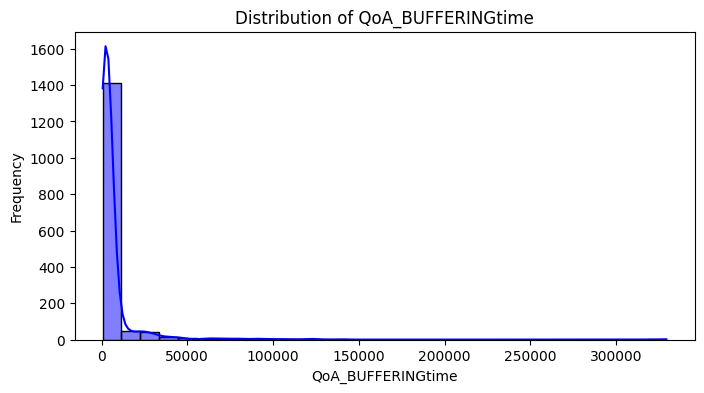

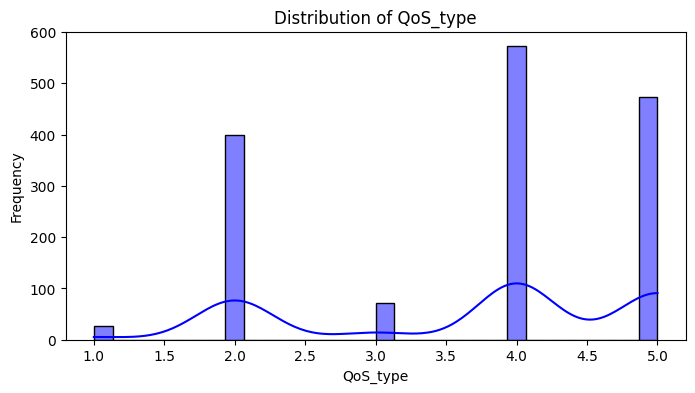

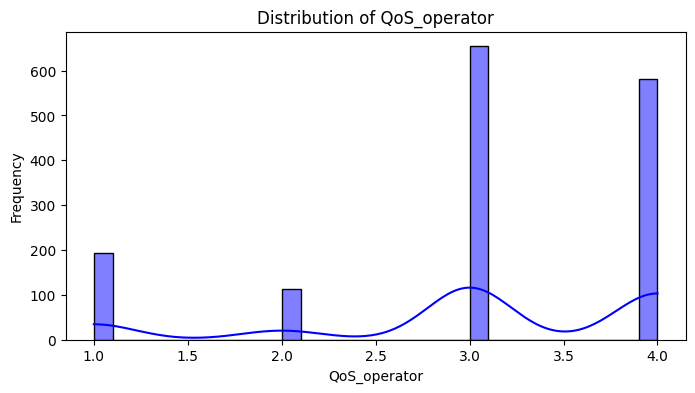

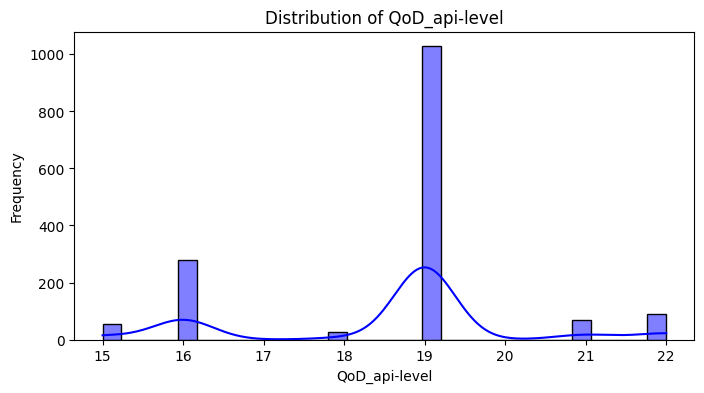

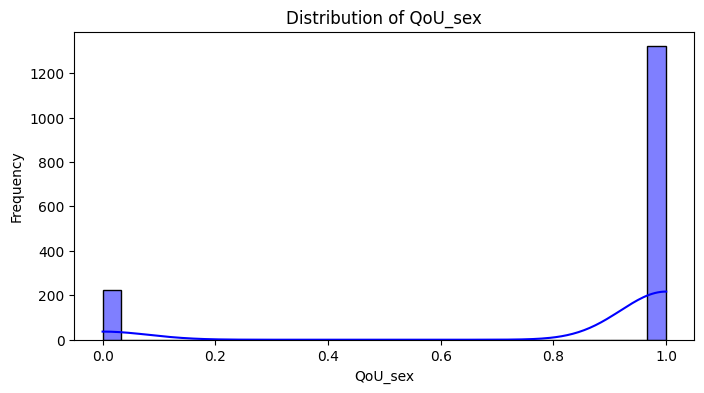

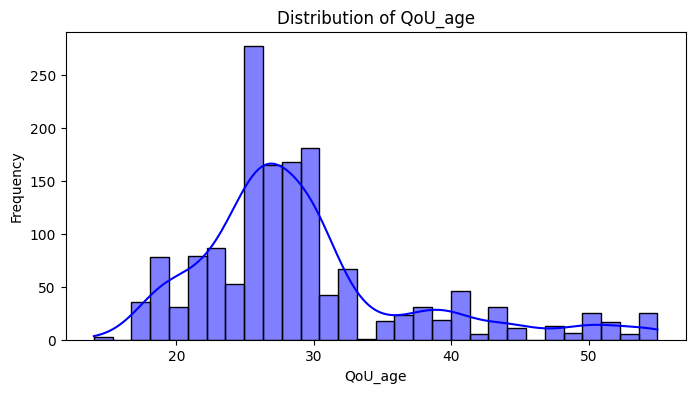

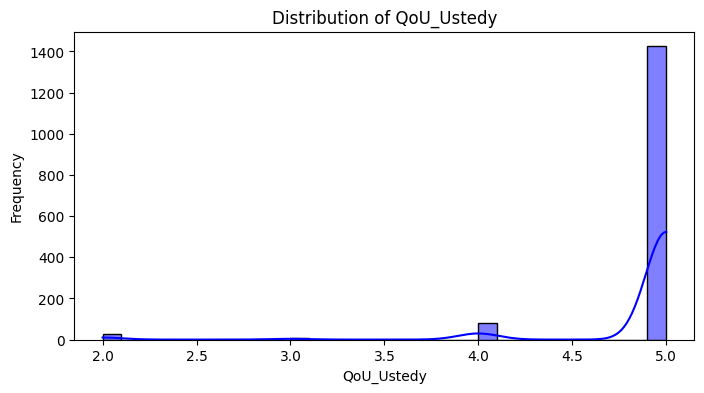

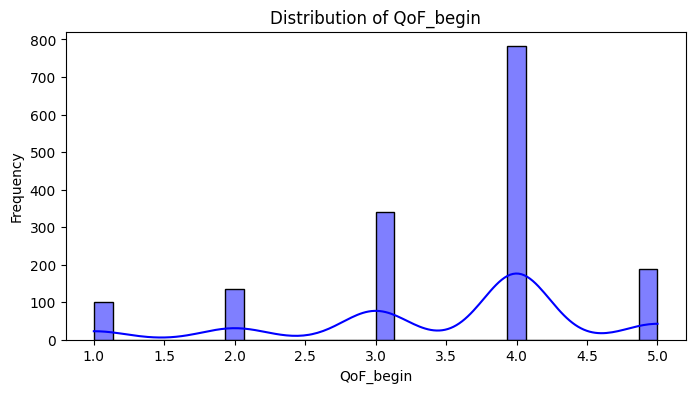

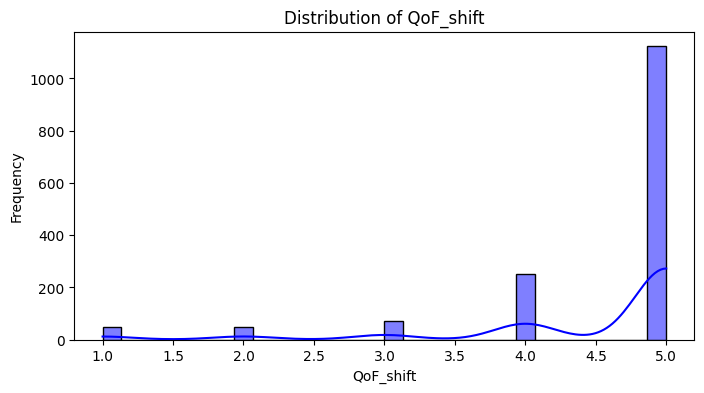

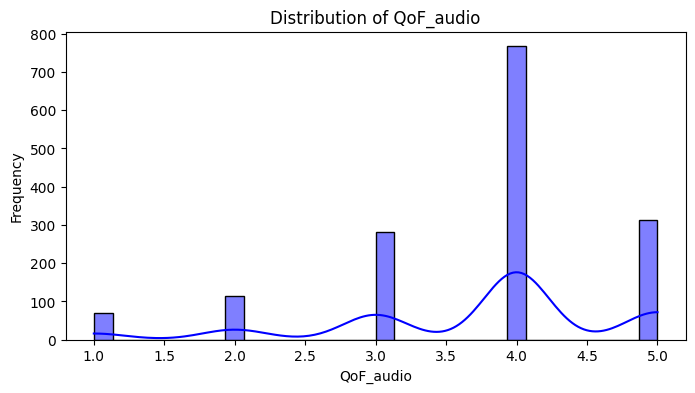

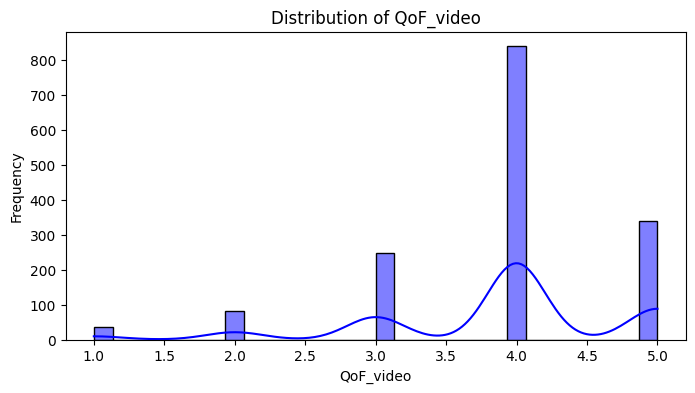

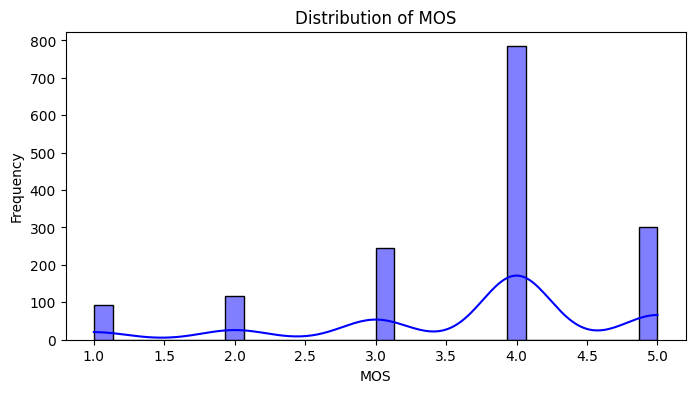

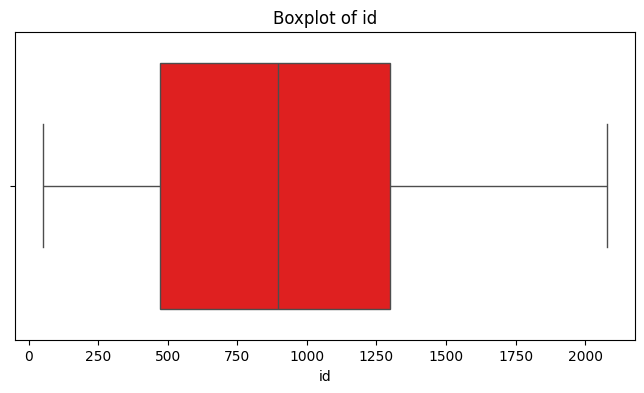

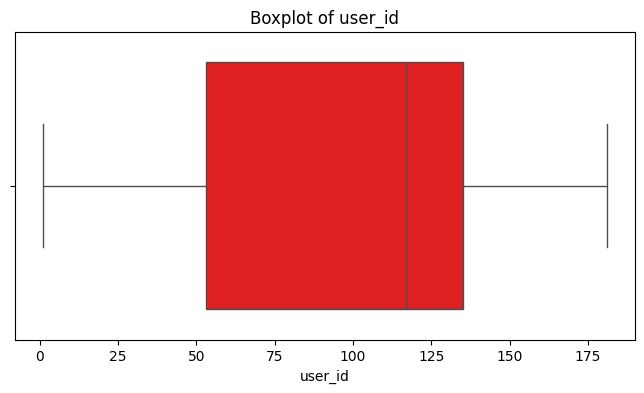

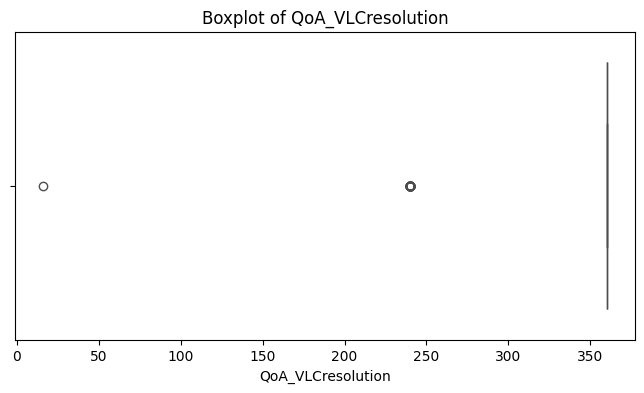

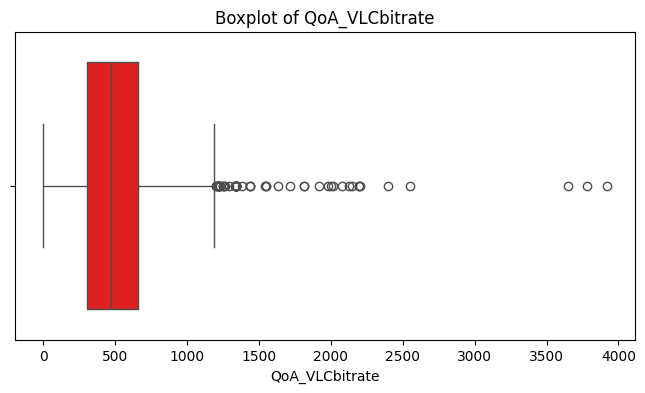

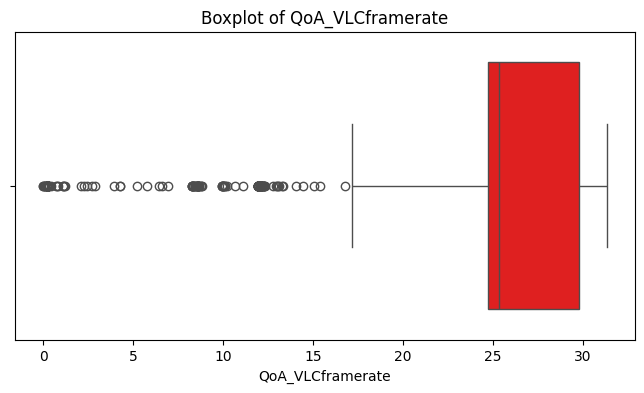

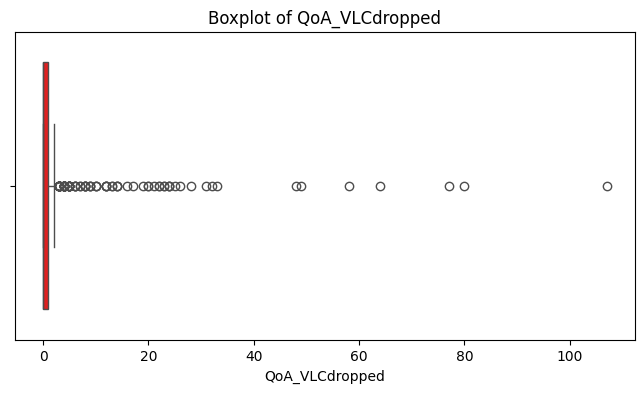

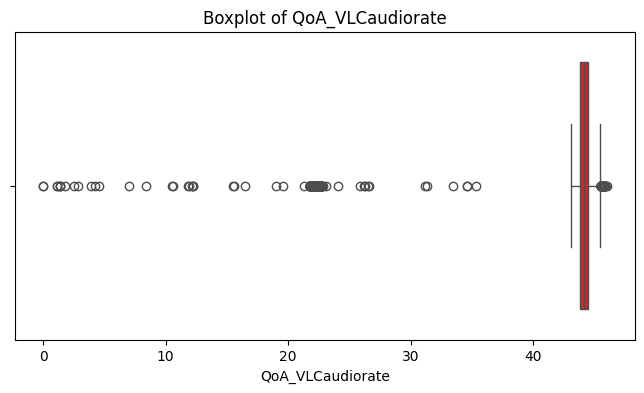

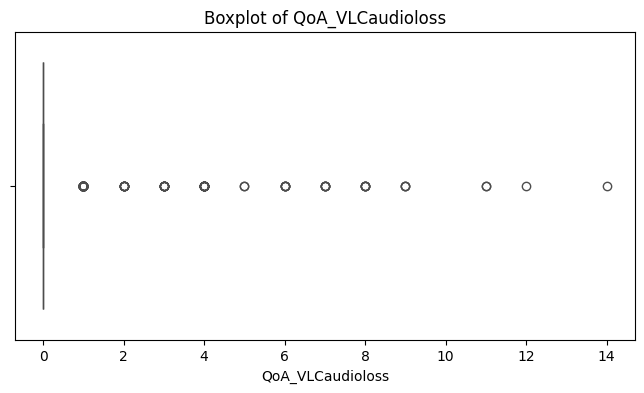

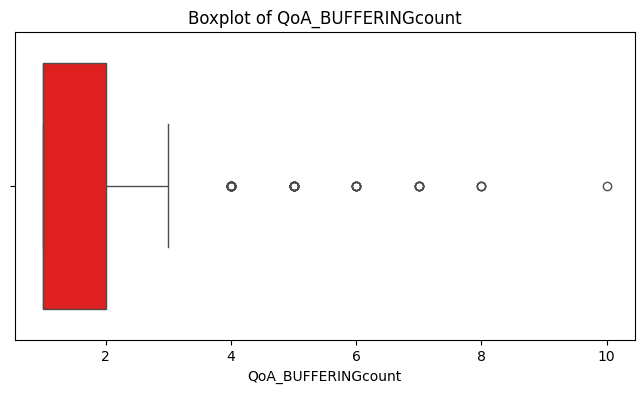

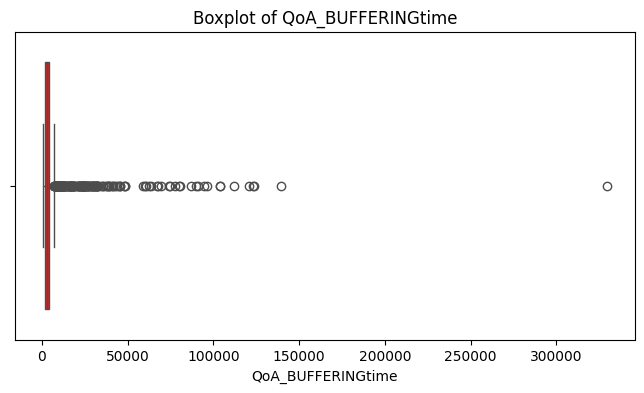

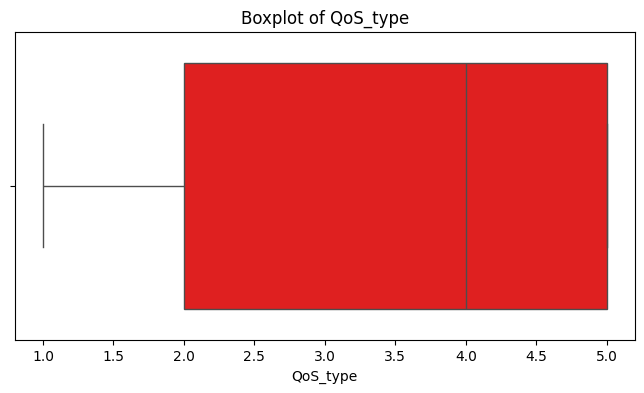

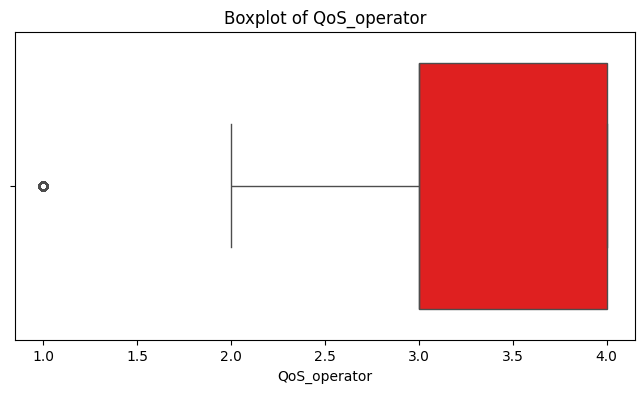

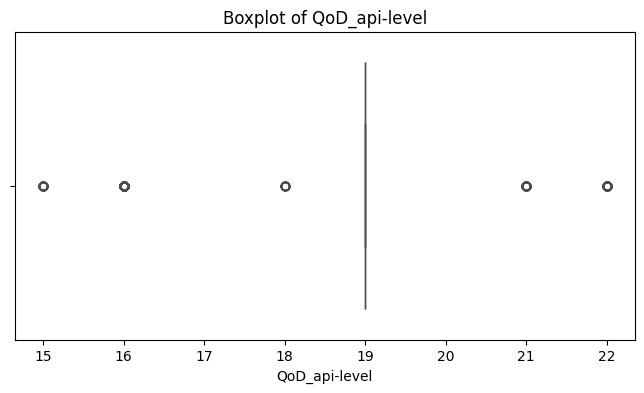

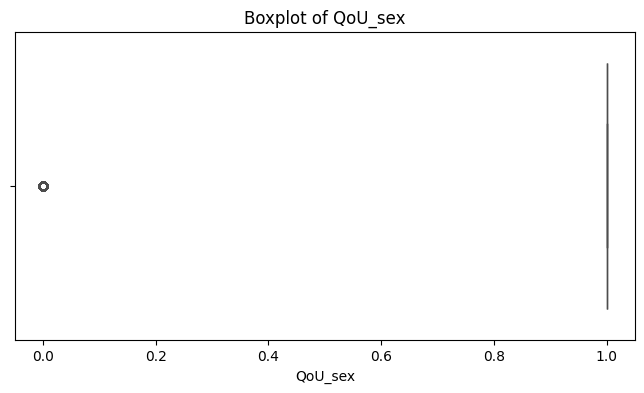

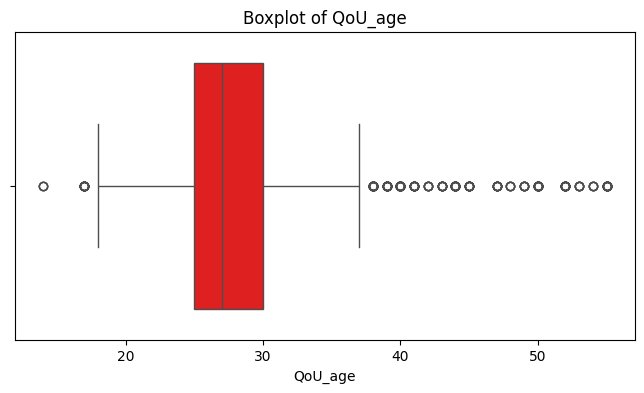

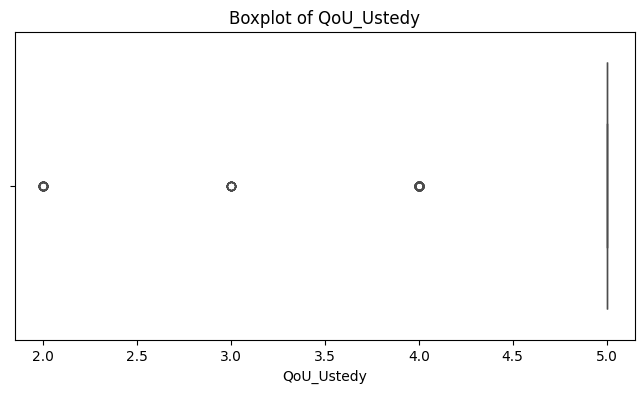

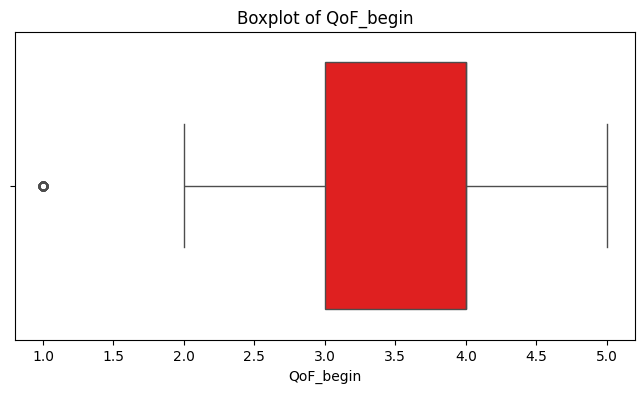

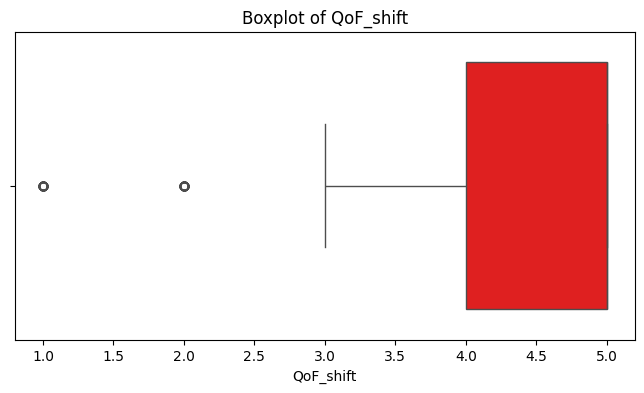

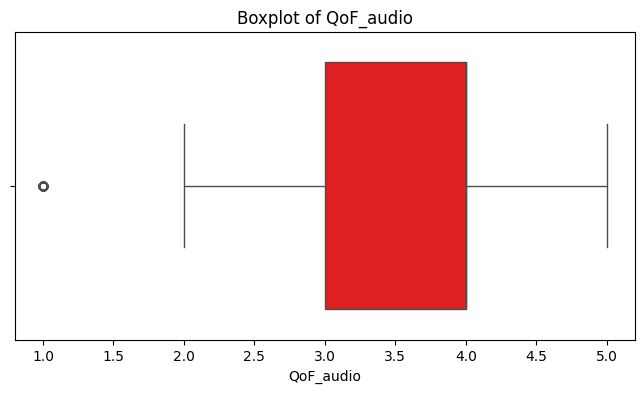

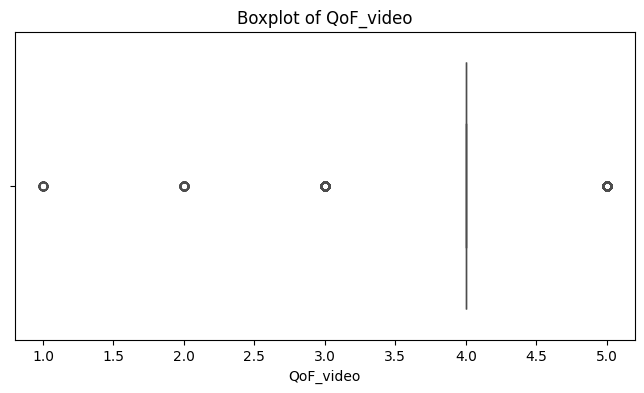

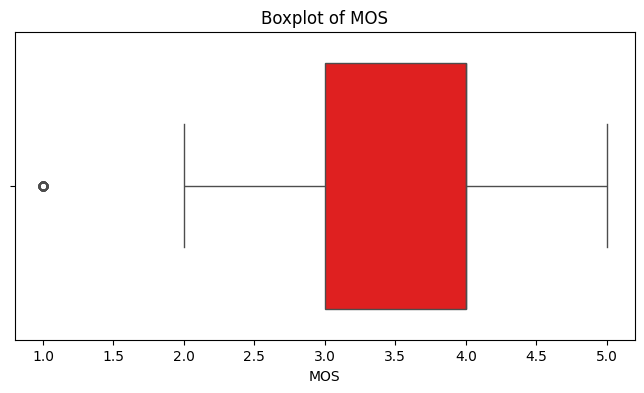

In [115]:
import numpy as np

# Numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns

# Plot distributions
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots to detect outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='red')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

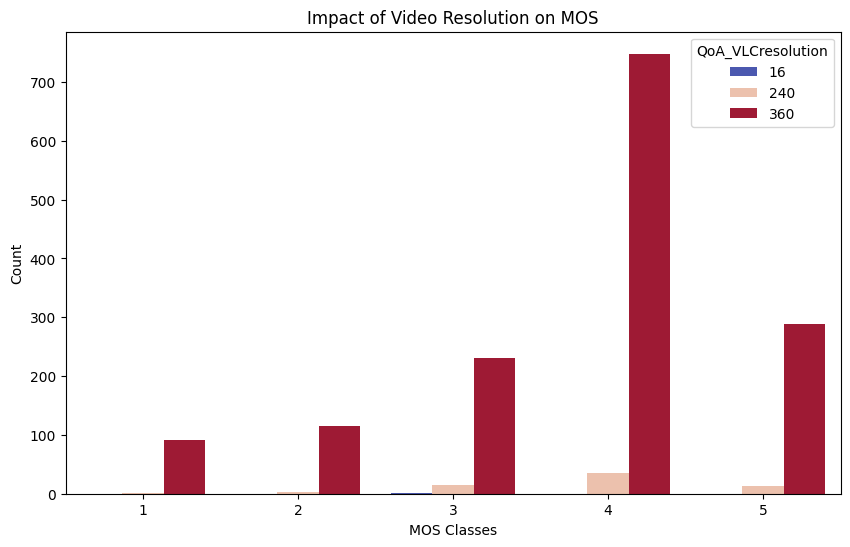

In [116]:
# Create a count plot of MOS for each video resolution with a different palette
plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='MOS', hue='QoA_VLCresolution', palette='coolwarm')

# Set plot labels and title
plt.xlabel('MOS Classes')
plt.ylabel('Count')
plt.title('Impact of Video Resolution on MOS')

# Show the plot
plt.show()


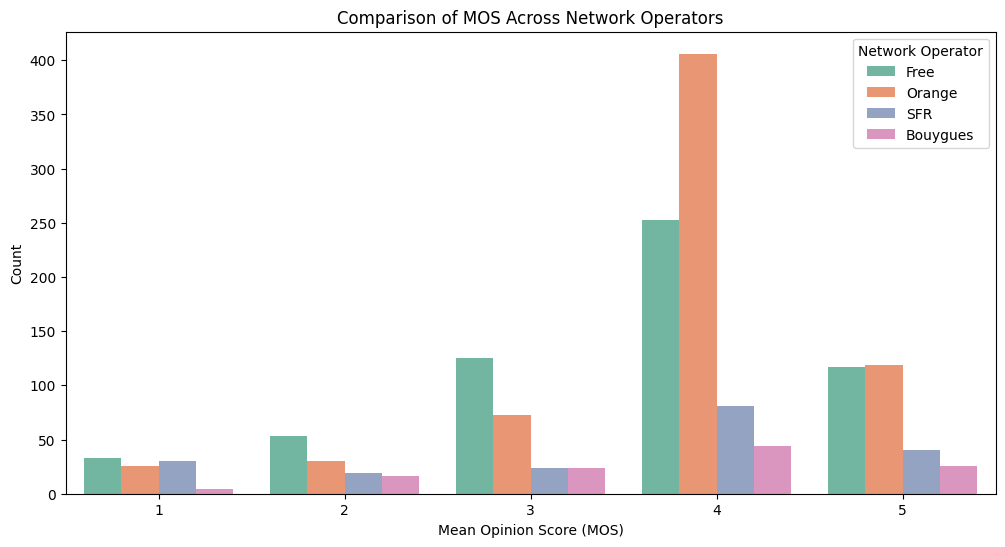

In [117]:
# Map the operator IDs to their respective names
operator_names = {
    1: "SFR",
    2: "Bouygues",
    3: "Orange",
    4: "Free"
}

# Create a new column in the dataset with operator names
data['Operator_Name'] = data['QoS_operator'].map(operator_names)

# Visualization: Distribution of MOS for each Operator
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x='MOS',
    hue='Operator_Name',  # Use operator names as the hue
    palette='Set2'
)

# Set plot labels and title
plt.title('Comparison of MOS Across Network Operators')
plt.xlabel('Mean Opinion Score (MOS)')
plt.ylabel('Count')
plt.legend(title='Network Operator')
plt.show()

# Remove the Operator_Name column to reset the dataset
data.drop(columns=['Operator_Name'], inplace=True)


<ipython-input-118-92bc7c49972c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


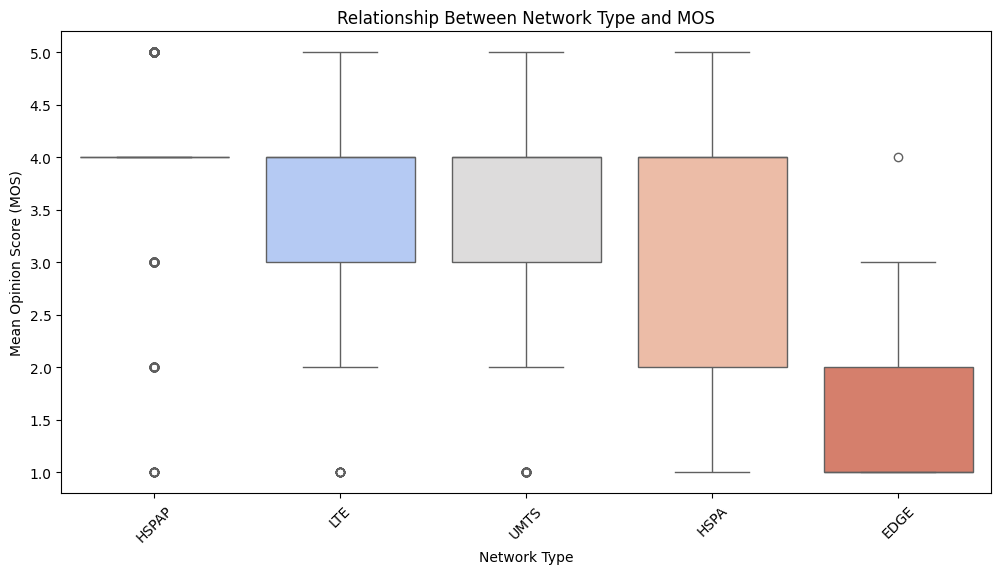

In [118]:


# Map the network type IDs to their respective names
network_type_names = {
    1: "EDGE",
    2: "UMTS",
    3: "HSPA",
    4: "HSPAP",
    5: "LTE"
}

# Create a new column in the dataset with network type names
data['Network_Type_Name'] = data['QoS_type'].map(network_type_names)

# Create a boxplot to visualize the relationship between network type and MOS
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Network_Type_Name',
    y='MOS',
    data=data,
    palette='coolwarm'
)

# Set plot labels and title
plt.title('Relationship Between Network Type and MOS')
plt.xlabel('Network Type')
plt.ylabel('Mean Opinion Score (MOS)')
plt.xticks(rotation=45)
plt.show()

# Remove the temporary Network_Type_Name column to reset the dataset
data.drop(columns=['Network_Type_Name'], inplace=True)


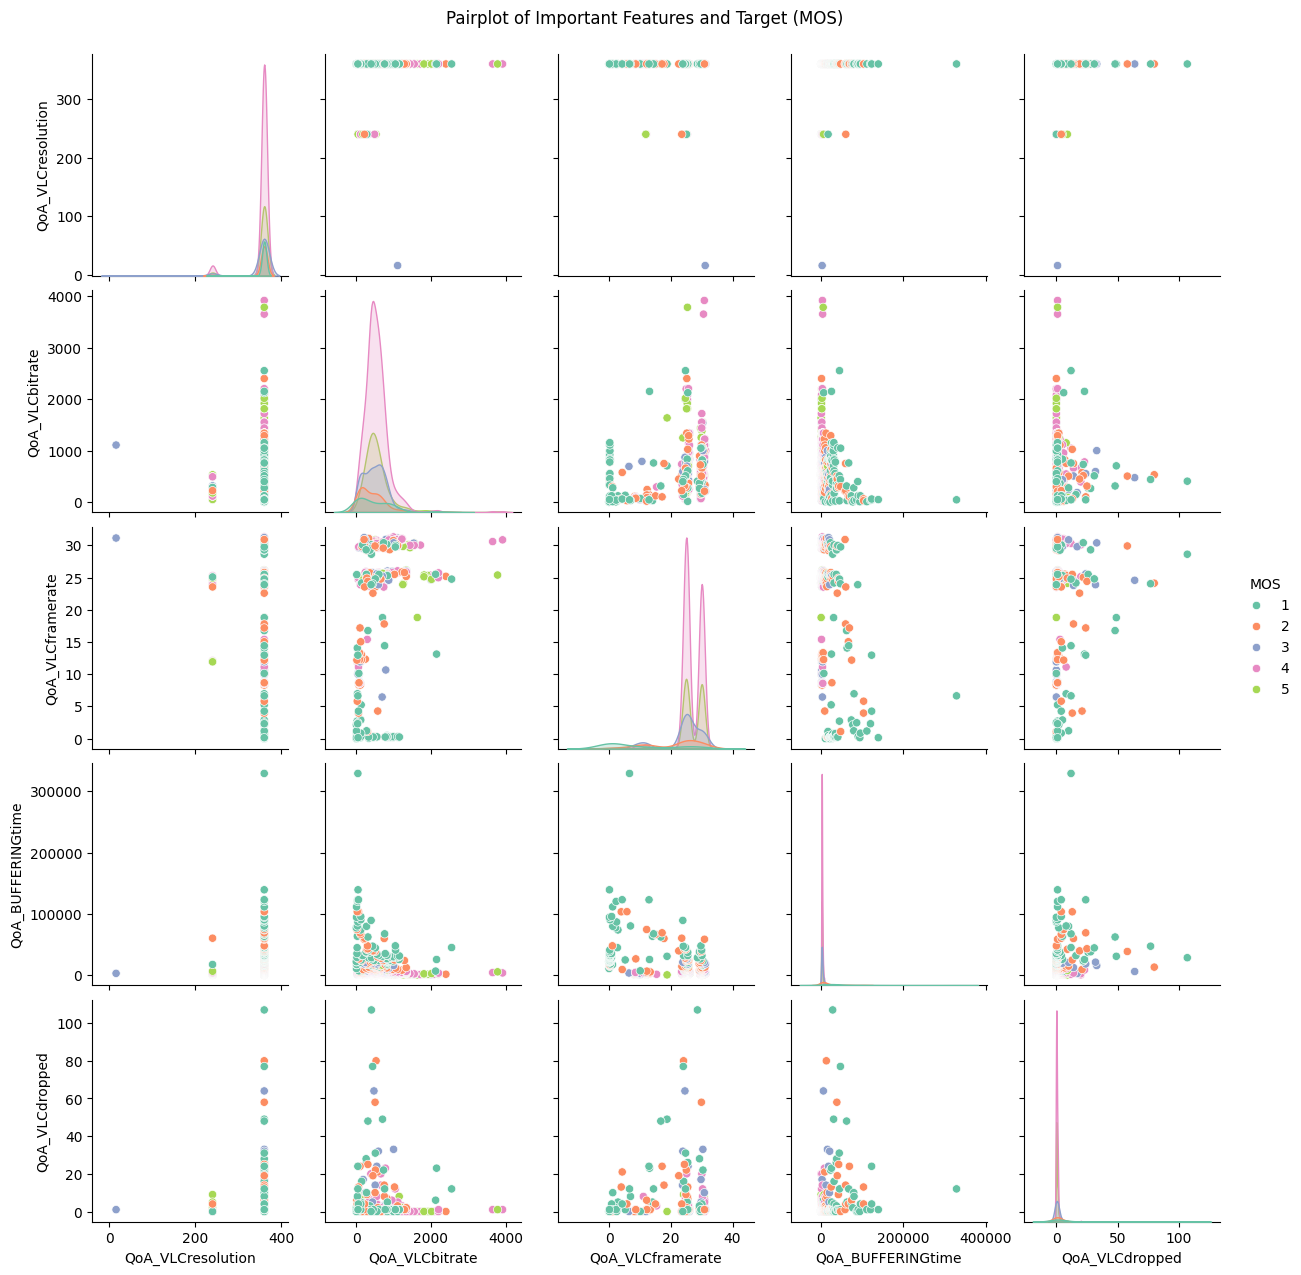

In [119]:
# Visualization 2: Pairplot (Exploration of relationships and distributions)
important_columns = ['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate', 'QoA_BUFFERINGtime','QoA_VLCdropped', 'MOS']
sns.pairplot(data[important_columns], diag_kind='kde', hue='MOS', palette='Set2')
plt.suptitle('Pairplot of Important Features and Target (MOS)', y=1.02)
plt.show()

In [120]:
print(data.dtypes)

id                      int64
user_id                 int64
QoA_VLCresolution       int64
QoA_VLCbitrate        float64
QoA_VLCframerate      float64
QoA_VLCdropped          int64
QoA_VLCaudiorate      float64
QoA_VLCaudioloss        int64
QoA_BUFFERINGcount      int64
QoA_BUFFERINGtime       int64
QoS_type                int64
QoS_operator            int64
QoD_model              object
QoD_os-version         object
QoD_api-level           int64
QoU_sex                 int64
QoU_age                 int64
QoU_Ustedy              int64
QoF_begin               int64
QoF_shift               int64
QoF_audio               int64
QoF_video               int64
MOS                     int64
dtype: object


In [121]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
data['QoD_model'] = LabelEncoder().fit_transform(data['QoD_model'])
data['QoD_os-version'] = LabelEncoder().fit_transform(data['QoD_os-version'])

In [122]:
print(data.dtypes)

id                      int64
user_id                 int64
QoA_VLCresolution       int64
QoA_VLCbitrate        float64
QoA_VLCframerate      float64
QoA_VLCdropped          int64
QoA_VLCaudiorate      float64
QoA_VLCaudioloss        int64
QoA_BUFFERINGcount      int64
QoA_BUFFERINGtime       int64
QoS_type                int64
QoS_operator            int64
QoD_model               int64
QoD_os-version          int64
QoD_api-level           int64
QoU_sex                 int64
QoU_age                 int64
QoU_Ustedy              int64
QoF_begin               int64
QoF_shift               int64
QoF_audio               int64
QoF_video               int64
MOS                     int64
dtype: object


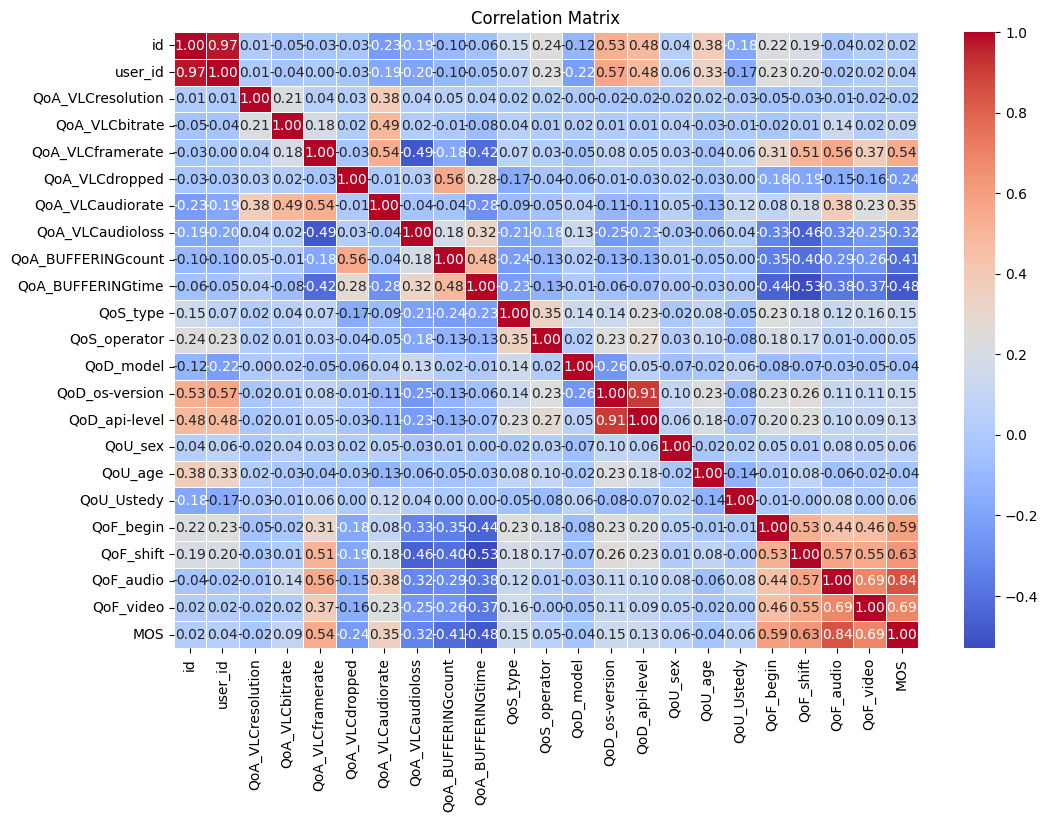


Correlation of features with MOS:
MOS                   1.000000
QoF_audio             0.840735
QoF_video             0.689358
QoF_shift             0.634058
QoF_begin             0.591324
QoA_VLCframerate      0.544164
QoA_VLCaudiorate      0.353631
QoD_os-version        0.149009
QoS_type              0.146741
QoD_api-level         0.133560
QoA_VLCbitrate        0.089671
QoU_sex               0.062251
QoU_Ustedy            0.055831
QoS_operator          0.048154
user_id               0.035284
id                    0.016395
QoA_VLCresolution    -0.022485
QoD_model            -0.036137
QoU_age              -0.039230
QoA_VLCdropped       -0.237135
QoA_VLCaudioloss     -0.323338
QoA_BUFFERINGcount   -0.411176
QoA_BUFFERINGtime    -0.482378
Name: MOS, dtype: float64


In [123]:
#  Correlation Analysis

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with MOS if it exists in numeric data
if 'MOS' in numeric_data.columns:
    target_correlation = correlation_matrix['MOS'].sort_values(ascending=False)
    print("\nCorrelation of features with MOS:")
    print(target_correlation)
else:
    print("\n'MOS' column not found in numeric data.")


In [124]:
data.describe()

id      user_id  QoA_VLCresolution  QoA_VLCbitrate  \
count  1543.000000  1543.000000        1543.000000     1543.000000   
mean    924.261180    98.128321         354.566429      520.522257   
std     525.492253    50.668531          25.939930      350.957926   
min      52.000000     1.000000          16.000000        0.003294   
25%     472.500000    53.000000         360.000000      307.668850   
50%     897.000000   117.000000         360.000000      474.000920   
75%    1298.500000   135.000000         360.000000      661.491925   
max    2077.000000   181.000000         360.000000     3918.293500   

       QoA_VLCframerate  QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  \
count       1543.000000     1543.000000       1543.000000       1543.000000   
mean          25.001576        1.217758         40.379790          0.235256   
std            6.690082        5.618366          9.123582          1.133616   
min            0.000000        0.000000          0.000000          0.000000   
25%           24.733333        0.000000         43.783333          0.000000   
50%           25.316667        0.000000         44.150000          0.000000   
75%           29.800000        1.000000         44.466667          0.000000   
max           31.316667      107.000000         46.000000         14.000000   

       QoA_BUFFERINGcount  QoA_BUFFERINGtime  ...  QoD_os-version  \
count         1543.000000        1543.000000  ...     1543.000000   
mean             1.392093        6164.184705  ...        8.155541   
std              0.895943       15032.225559  ...        4.336126   
min              1.000000         683.000000  ...        0.000000   
25%              1.000000        2010.500000  ...        5.000000   
50%              1.000000        2719.000000  ...        9.000000   
75%              2.000000        4067.000000  ...       11.000000   
max             10.000000      329271.000000  ...       17.000000   

       QoD_api-level      QoU_sex      QoU_age   QoU_Ustedy    QoF_begin  \
count    1543.000000  1543.000000  1543.000000  1543.000000  1543.000000   
mean       18.560596     0.855476    29.179520     4.882048     3.533377   
std         1.642513     0.351734     8.006615     0.471312     1.025622   
min        15.000000     0.000000    14.000000     2.000000     1.000000   
25%        19.000000     1.000000    25.000000     5.000000     3.000000   
50%        19.000000     1.000000    27.000000     5.000000     4.000000   
75%        19.000000     1.000000    30.000000     5.000000     4.000000   
max        22.000000     1.000000    55.000000     5.000000     5.000000   

         QoF_shift    QoF_audio    QoF_video          MOS  
count  1543.000000  1543.000000  1543.000000  1543.000000  
mean      4.523655     3.738820     3.884640     3.702528  
std       0.953146     1.006382     0.887098     1.056283  
min       1.000000     1.000000     1.000000     1.000000  
25%       4.000000     3.000000     4.000000     3.000000  
50%       5.000000     4.000000     4.000000     4.000000  
75%       5.000000     4.000000     4.000000     4.000000  
max       5.000000     5.000000     5.000000     5.000000  

[8 rows x 23 columns]

In [125]:
print(data['QoA_VLCdropped'].describe())

count    1543.000000
mean        1.217758
std         5.618366
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       107.000000
Name: QoA_VLCdropped, dtype: float64


In [126]:
print(data['QoA_BUFFERINGtime'].describe())

count      1543.000000
mean       6164.184705
std       15032.225559
min         683.000000
25%        2010.500000
50%        2719.000000
75%        4067.000000
max      329271.000000
Name: QoA_BUFFERINGtime, dtype: float64


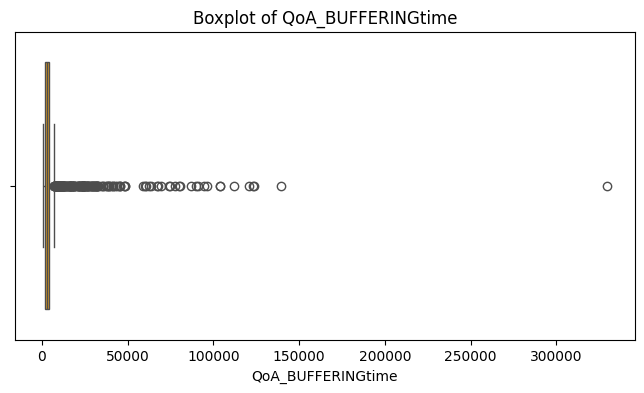

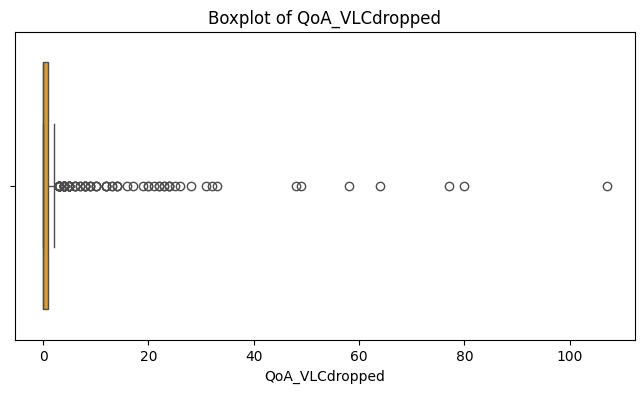

In [127]:
# Boxplots for outliers
columns_to_check = ['QoA_BUFFERINGtime', 'QoA_VLCdropped']


for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [128]:

    # Cap outliers using the 95th percentile

    threshold= data['QoA_VLCdropped'].quantile(0.97)
    data = data[data['QoA_VLCdropped'] < threshold]


In [129]:
print(data['QoA_VLCdropped'].describe())

count    1495.000000
mean        0.480936
std         0.877812
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: QoA_VLCdropped, dtype: float64


In [130]:

# Cap outliers using the 95th percentile

threshold = data['QoA_BUFFERINGtime'].quantile(0.97)
data = data[data['QoA_BUFFERINGtime'] < threshold]

In [131]:
print(data['QoA_BUFFERINGtime'].describe())

count     1450.000000
mean      3631.406207
std       3578.269790
min        683.000000
25%       1972.250000
50%       2625.500000
75%       3724.750000
max      26877.000000
Name: QoA_BUFFERINGtime, dtype: float64


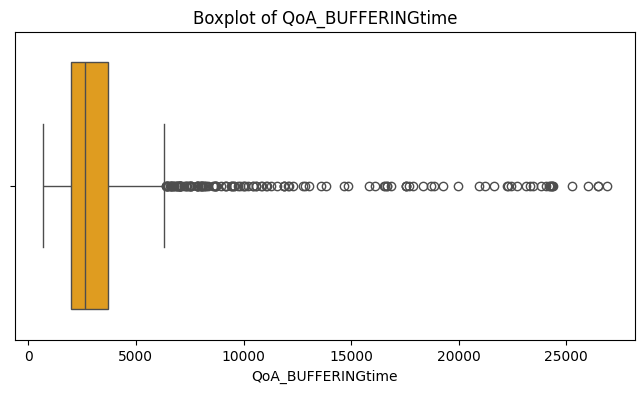

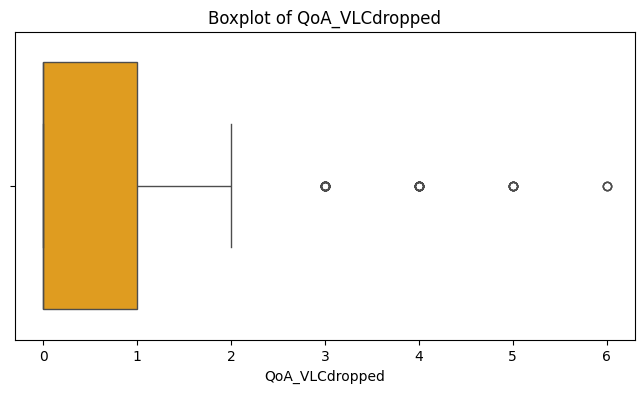

In [132]:
# Boxplots for outliers
columns_to_check = ['QoA_BUFFERINGtime', 'QoA_VLCdropped']


for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [133]:
data.describe()


id      user_id  QoA_VLCresolution  QoA_VLCbitrate  \
count  1450.000000  1450.000000        1450.000000     1450.000000   
mean    933.335862    99.000000         354.383448      522.094703   
std     525.074913    50.575596          26.383000      344.428090   
min      52.000000     1.000000          16.000000        0.003294   
25%     474.250000    53.000000         360.000000      326.612685   
50%     917.500000   117.000000         360.000000      474.501185   
75%    1305.750000   135.750000         360.000000      661.226328   
max    2077.000000   181.000000         360.000000     3918.293500   

       QoA_VLCframerate  QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  \
count       1450.000000     1450.000000       1450.000000       1450.000000   
mean          25.603896        0.448276         40.779724          0.145517   
std            5.706858        0.824328          8.475064          0.848128   
min            0.000000        0.000000          0.000000          0.000000   
25%           24.770833        0.000000         43.783333          0.000000   
50%           25.350000        0.000000         44.150000          0.000000   
75%           29.850000        1.000000         44.466667          0.000000   
max           31.316667        6.000000         45.883333         12.000000   

       QoA_BUFFERINGcount  QoA_BUFFERINGtime  ...  QoD_os-version  \
count         1450.000000        1450.000000  ...     1450.000000   
mean             1.254483        3631.406207  ...        8.228966   
std              0.547972        3578.269790  ...        4.315858   
min              1.000000         683.000000  ...        0.000000   
25%              1.000000        1972.250000  ...        5.000000   
50%              1.000000        2625.500000  ...       10.000000   
75%              1.000000        3724.750000  ...       11.000000   
max              6.000000       26877.000000  ...       17.000000   

       QoD_api-level      QoU_sex      QoU_age   QoU_Ustedy    QoF_begin  \
count    1450.000000  1450.000000  1450.000000  1450.000000  1450.000000   
mean       18.591034     0.852414    29.288966     4.880000     3.637931   
std         1.639843     0.354812     8.087766     0.472224     0.926161   
min        15.000000     0.000000    14.000000     2.000000     1.000000   
25%        19.000000     1.000000    25.000000     5.000000     3.000000   
50%        19.000000     1.000000    27.000000     5.000000     4.000000   
75%        19.000000     1.000000    31.000000     5.000000     4.000000   
max        22.000000     1.000000    55.000000     5.000000     5.000000   

         QoF_shift    QoF_audio    QoF_video          MOS  
count  1450.000000  1450.000000  1450.000000  1450.000000  
mean      4.642069     3.823448     3.957241     3.825517  
std       0.770055     0.932062     0.811132     0.926139  
min       1.000000     1.000000     1.000000     1.000000  
25%       5.000000     3.000000     4.000000     3.000000  
50%       5.000000     4.000000     4.000000     4.000000  
75%       5.000000     4.000000     4.000000     4.000000  
max       5.000000     5.000000     5.000000     5.000000  

[8 rows x 23 columns]

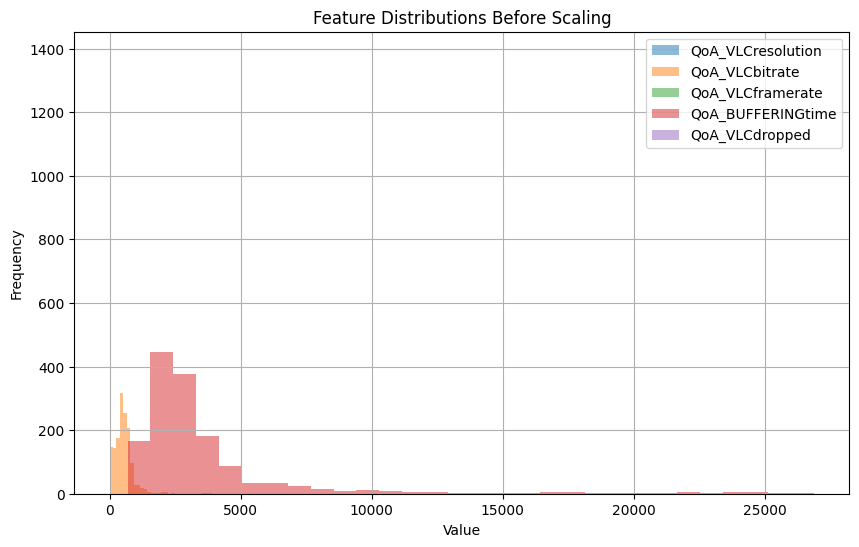

In [134]:


# Define the columns to plot
features = ['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate', 'QoA_BUFFERINGtime','QoA_VLCdropped']

# Plot all features in the same histogram
plt.figure(figsize=(10, 6))
for feature in features:
    plt.hist(data[feature], bins=30, alpha=0.5, label=feature)

# Title and labels
plt.title("Feature Distributions Before Scaling")
plt.xlabel("Value")
plt.ylabel("Frequency")


# Add legend, grid, and show the plot
plt.legend(loc="upper right")
plt.grid(True)
plt.show()




In [135]:
from sklearn.preprocessing import  StandardScaler


"""#Handle missing values
# Handle outliers (e.g., 95th percentile for selected columns)
columns_with_outliers = ['QoA_VLCdropped', 'QoA_BUFFERINGtime']
for col in columns_with_outliers:
    threshold = data[col].quantile(0.95)
    data[col] = data[col].clip(upper=threshold)
"""


# Normalize selected numerical features
scaler = StandardScaler()
columns_to_normalize = ['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate', 'QoA_BUFFERINGtime','QoA_VLCdropped']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

print("\nPreprocessing completed successfully.")


Preprocessing completed successfully.


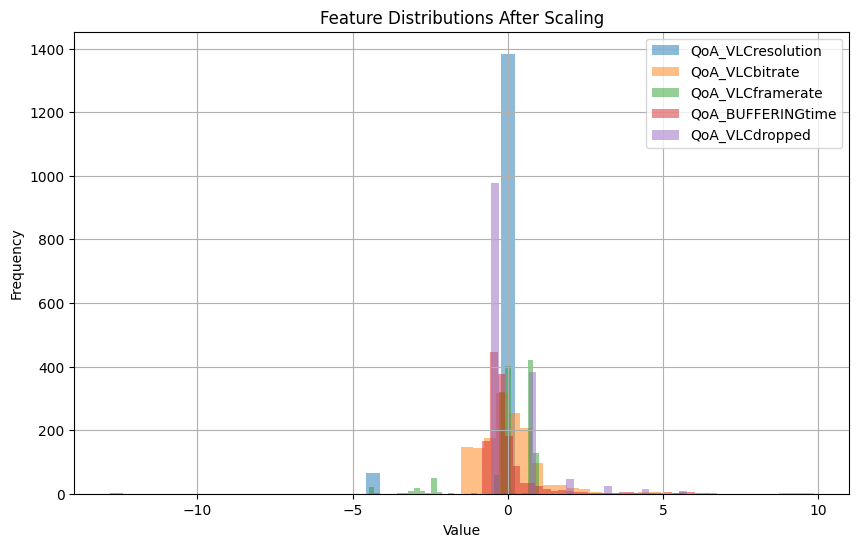

In [136]:

# Define the columns to plot
features = ['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate', 'QoA_BUFFERINGtime','QoA_VLCdropped']

# Plot all features in the same histogram
plt.figure(figsize=(10, 6))
for feature in features:
    plt.hist(data[feature], bins=30, alpha=0.5, label=feature)

plt.title("Feature Distributions After Scaling")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [137]:
# Dropping irrelevant features based on correlation
irrelevant_features = ['QoD_model', 'QoD_os-version', 'id', 'user_id','QoU_age','QoU_sex']
data = data.drop(columns=irrelevant_features)

In [138]:
data.describe()

QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  QoA_VLCdropped  \
count       1.450000e+03    1.450000e+03      1.450000e+03    1.450000e+03   
mean        8.330501e-17   -1.372083e-16      3.724224e-16   -3.920236e-17   
std         1.000345e+00    1.000345e+00      1.000345e+00    1.000345e+00   
min        -1.283024e+01   -1.516344e+00     -4.488061e+00   -5.439950e-01   
25%         2.129587e-01   -5.677512e-01     -1.460260e-01   -5.439950e-01   
50%         2.129587e-01   -1.382290e-01     -4.450495e-02   -5.439950e-01   
75%         2.129587e-01    4.040891e-01      7.442920e-01    6.695323e-01   
max         2.129587e-01    9.863802e+00      1.001381e+00    6.737168e+00   

       QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
count       1450.000000       1450.000000         1450.000000   
mean          40.779724          0.145517            1.254483   
std            8.475064          0.848128            0.547972   
min            0.000000          0.000000            1.000000   
25%           43.783333          0.000000            1.000000   
50%           44.150000          0.000000            1.000000   
75%           44.466667          0.000000            1.000000   
max           45.883333         12.000000            6.000000   

       QoA_BUFFERINGtime     QoS_type  QoS_operator  QoD_api-level  \
count       1.450000e+03  1450.000000   1450.000000    1450.000000   
mean       -7.840472e-17     3.757241      3.074483      18.591034   
std         1.000345e+00     1.164387      0.963787       1.639843   
min        -8.242597e-01     1.000000      1.000000      15.000000   
25%        -4.638355e-01     2.000000      3.000000      19.000000   
50%        -2.812122e-01     4.000000      3.000000      19.000000   
75%         2.609529e-02     5.000000      4.000000      19.000000   
max         6.498564e+00     5.000000      4.000000      22.000000   

        QoU_Ustedy    QoF_begin    QoF_shift    QoF_audio    QoF_video  \
count  1450.000000  1450.000000  1450.000000  1450.000000  1450.000000   
mean      4.880000     3.637931     4.642069     3.823448     3.957241   
std       0.472224     0.926161     0.770055     0.932062     0.811132   
min       2.000000     1.000000     1.000000     1.000000     1.000000   
25%       5.000000     3.000000     5.000000     3.000000     4.000000   
50%       5.000000     4.000000     5.000000     4.000000     4.000000   
75%       5.000000     4.000000     5.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

               MOS  
count  1450.000000  
mean      3.825517  
std       0.926139  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       4.000000  
max       5.000000

In [139]:
"""from imblearn.over_sampling import SMOTE
from collections import Counter

# Handling imbalanced target variable (MOS)
X = data.drop(columns=['MOS'])
y = data['MOS']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y_resampled))"""


from collections import Counter

# Handling imbalanced target variable (MOS)
X = data.drop(columns=['MOS'])
y = data['MOS']

# Check class distribution before applying SMOTE (optional)
print("Original class distribution:", Counter(y))


Original class distribution: Counter({4: 776, 5: 299, 3: 239, 2: 95, 1: 41})


In [140]:


from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE to the training set
print("\nClass distribution after SMOTE on training data:", Counter(y_train_resampled))

# Define cross-validation on the training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Check the data split
print("\nData split completed:")
print(f"Training set size before SMOTE: {X_train.shape[0]} rows")
print(f"Training set size after SMOTE: {X_train_resampled.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")



Class distribution after SMOTE on training data: Counter({3: 621, 4: 621, 1: 621, 5: 621, 2: 621})

Data split completed:
Training set size before SMOTE: 1160 rows
Training set size after SMOTE: 3105 rows
Test set size: 290 rows


In [141]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Train Random Forest with cross-validation
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,#42
    max_depth=8, #10
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced'
)

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(
    rf_model,
    # X_train,
    # y_train,
    X_train_resampled,
    y_train_resampled,
    cv=5,
    scoring='accuracy'
  )
print("\nRandom Forest Cross-Validation Accuracy:")
print(f"Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")

# Train and evaluate Random Forest
rf_model.fit( X_train_resampled, y_train_resampled)#X_train, y_train)
rf_pred_train = rf_model.predict(
    X_train_resampled)
    #X_train)
rf_pred_test = rf_model.predict(X_test)

# Evaluate on training set
print("\nRandom Forest Training Set Classification Report:")
print(classification_report( y_train_resampled, rf_pred_train))#y_train, rf_pred_train))
print(f"Training Accuracy Score (Random Forest): {accuracy_score(y_train_resampled, rf_pred_train):.4f}")#y_train, rf_pred_train):.4f}")

# Evaluate on test set
print("\nRandom Forest Test Set Classification Report:")
print(classification_report(y_test, rf_pred_test))
print(f"Test Accuracy Score (Random Forest): {accuracy_score(y_test, rf_pred_test):.4f}")


# Train Gradient Boosting with cross-validation
gb_model = GradientBoostingClassifier(
    n_estimators=100,            # Reduced number of estimators
    learning_rate=0.01,          # Slower learning rate
    max_depth=4,                 # Simpler trees
    subsample=0.8,               # Use only 80% of data for each tree
    min_samples_split=10,        # Larger minimum split size#10
    min_samples_leaf=5,          # Larger leaf size#5
    random_state=42
)

# Perform cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(
    gb_model,
    # X_train,
    # y_train,
    X_train_resampled,
    y_train_resampled,
    cv=5,
    scoring='accuracy'
    )
print("\nGradient Boosting Cross-Validation Accuracy:")
print(f"Mean Accuracy: {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std():.4f})")

# Train and evaluate Gradient Boosting
gb_model.fit(X_train_resampled, y_train_resampled)#X_train, y_train)
gb_pred_train = gb_model.predict(X_train_resampled)#X_train)
gb_pred_test = gb_model.predict(X_test)

# Evaluate on training set
print("\nGradient Boosting Training Set Classification Report:")
print(classification_report(y_train_resampled, gb_pred_train))#y_train, gb_pred_train))
print(f"Training Accuracy Score (Gradient Boosting): {accuracy_score(y_train_resampled, gb_pred_train):.4f}")#y_train, gb_pred_train):.4f}")

# Evaluate on test set
print("\nGradient Boosting Test Set Classification Report:")
print(classification_report(y_test, gb_pred_test))
print(f"Test Accuracy Score (Gradient Boosting): {accuracy_score(y_test, gb_pred_test):.4f}")





Random Forest Cross-Validation Accuracy:
Mean Accuracy: 0.8779 (+/- 0.0133)

Random Forest Training Set Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       621
           2       0.95      0.94      0.95       621
           3       0.87      0.89      0.88       621
           4       0.79      0.84      0.82       621
           5       0.95      0.85      0.89       621

    accuracy                           0.90      3105
   macro avg       0.90      0.90      0.90      3105
weighted avg       0.90      0.90      0.90      3105

Training Accuracy Score (Random Forest): 0.9024

Random Forest Test Set Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.50      0.62         8
           2       0.77      0.89      0.83        19
           3       0.58      0.75      0.65        48
           4       0.90      0.78      0.83       155
           5     


Random Forest Confusion Matrix:
[[  4   1   2   1   0]
 [  0  17   1   0   1]
 [  1   3  36   6   2]
 [  0   1  23 121  10]
 [  0   0   0   7  53]]


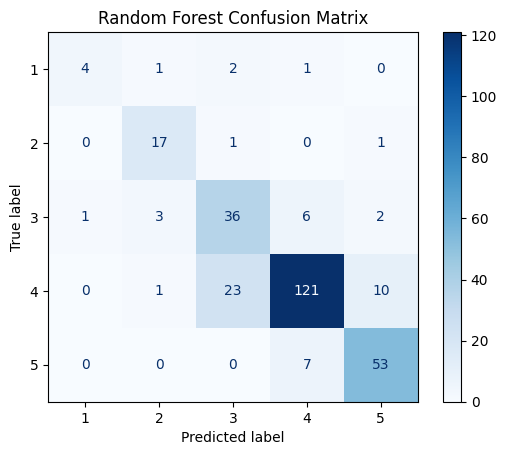


Gradient Boosting Confusion Matrix:
[[  5   1   2   0   0]
 [  1  16   0   1   1]
 [  1   5  33   7   2]
 [  0   1  23 122   9]
 [  0   0   0   7  53]]


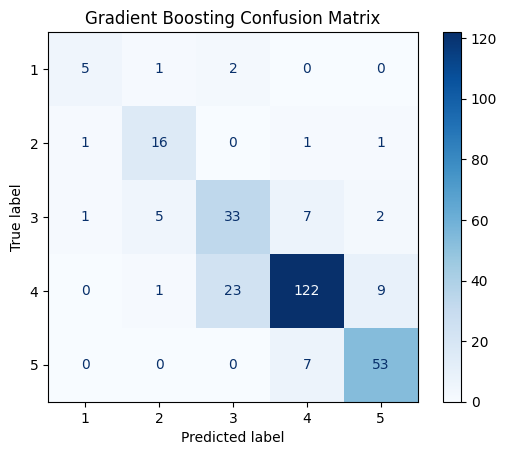

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred_test)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)

# Plot confusion matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Generate confusion matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_pred_test)
print("\nGradient Boosting Confusion Matrix:")
print(gb_cm)

# Plot confusion matrix for Gradient Boosting
disp_gb = ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=gb_model.classes_)
disp_gb.plot(cmap=plt.cm.Blues)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


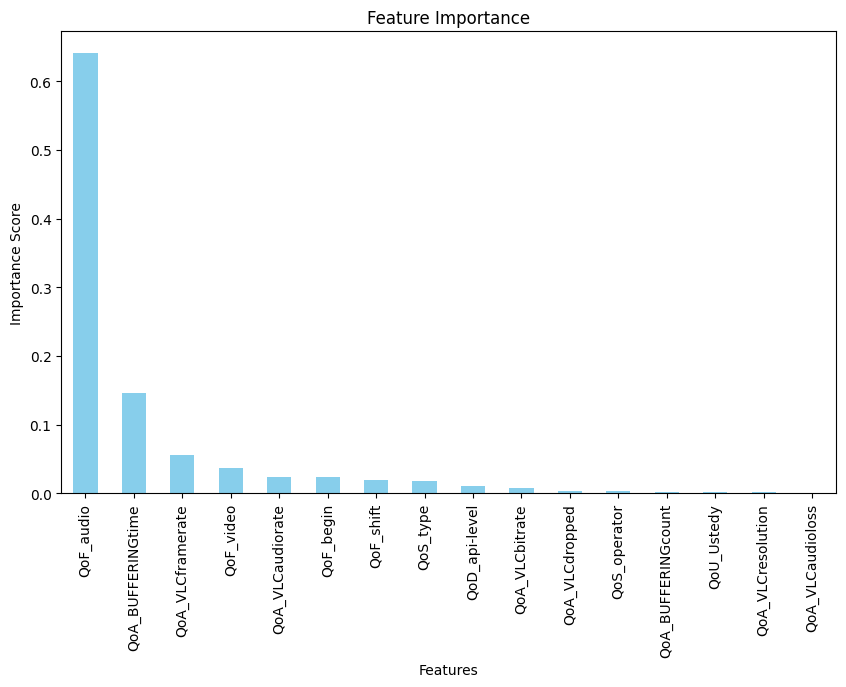

In [143]:
# Feature importance for Gradient Boosting
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [144]:
import joblib

# Save the best model
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print("Model saved as 'gradient_boosting_model.pkl'")


Model saved as 'gradient_boosting_model.pkl'
